In [1]:
import import_ipynb
%run utils.ipynb


2025-01-03 11:39:52.411423: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 11:39:52.412408: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 11:39:52.415520: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 11:39:52.423491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735871992.437592   11734 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735871992.44

In [2]:
# Load the datasets
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler

def load_and_explore_datasets(folder_path):
    train_file = os.path.join(folder_path, "train.csv")
    val_file = os.path.join(folder_path, "val.csv")
    test_file = os.path.join(folder_path, "test.csv")

    train_data = pd.read_csv(train_file)
    val_data = pd.read_csv(val_file)
    test_data = pd.read_csv(test_file)

    train_data['Label'] = train_data['attack_cat']
    val_data['Label'] = val_data['attack_cat']
    test_data['Label'] = test_data['attack_cat']

    print("Train Dataset:")
    print(train_data.info())
    print(train_data.head(), "\n")

    print("Validation Dataset:")
    print(val_data.info())
    print(val_data.head(), "\n")

    print("Test Dataset:")
    print(test_data.info())
    print(test_data.head(), "\n")

    print("Missing values in Train dataset:")
    print(train_data.isnull().sum(), "\n")

    print("Missing values in Validation dataset:")
    print(val_data.isnull().sum(), "\n")

    print("Missing values in Test dataset:")
    print(test_data.isnull().sum(), "\n")

    print("Class distribution in Train dataset:")
    print(train_data['Label'].value_counts(), "\n")

    print("Class distribution in Validation dataset:")
    print(val_data['Label'].value_counts(), "\n")

    print("Class distribution in Test dataset:")
    print(test_data['Label'].value_counts(), "\n")

    return train_data, val_data, test_data

folder_path = "./UNSW_NB15/"
train_data, val_data, test_data = load_and_explore_datasets(folder_path)


Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180371 entries, 0 to 180370
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 180371 non-null  int64  
 1   dur                180371 non-null  float64
 2   proto              180371 non-null  object 
 3   service            180371 non-null  object 
 4   state              180371 non-null  object 
 5   spkts              180371 non-null  int64  
 6   dpkts              180371 non-null  int64  
 7   sbytes             180371 non-null  int64  
 8   dbytes             180371 non-null  int64  
 9   rate               180371 non-null  float64
 10  sttl               180371 non-null  int64  
 11  dttl               180371 non-null  int64  
 12  sload              180371 non-null  float64
 13  dload              180371 non-null  float64
 14  sloss              180371 non-null  int64  
 15  dloss              180371 non-null  

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test, le, scaler, labels = preprocess_data(train_data, val_data, test_data)


Unique labels in train data: ['Normal' 'Analysis' 'Generic' 'Exploits' 'Fuzzers' 'DoS' 'Shellcode'
 'Reconnaissance' 'Backdoor' 'Worms']
Unique labels in validation data: ['Exploits' 'Normal' 'Generic' 'DoS' 'Reconnaissance' 'Fuzzers' 'Backdoor'
 'Analysis' 'Shellcode' 'Worms']
Unique labels in test data: ['Generic' 'Exploits' 'Fuzzers' 'Reconnaissance' 'Normal' 'DoS' 'Analysis'
 'Backdoor' 'Shellcode' 'Worms']

Fitting LabelEncoder on training labels...
Classes found by LabelEncoder: ['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms']

Encoding labels for train, validation, and test datasets...

Encoded Train Labels (first 10): [6 0 5 5 6 6 5 6 3 3]
Encoded Validation Labels (first 10): [3 6 5 6 6 6 6 6 6 3]
Encoded Test Labels (first 10): [5 3 4 7 5 3 7 4 6 7]

Processing features for the train dataset...
Train features (numeric): (180371, 30)
Train features (categorical): (180371, 4)

Encoding categorical features in train data

/tmp/ipykernel_11734/432265042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


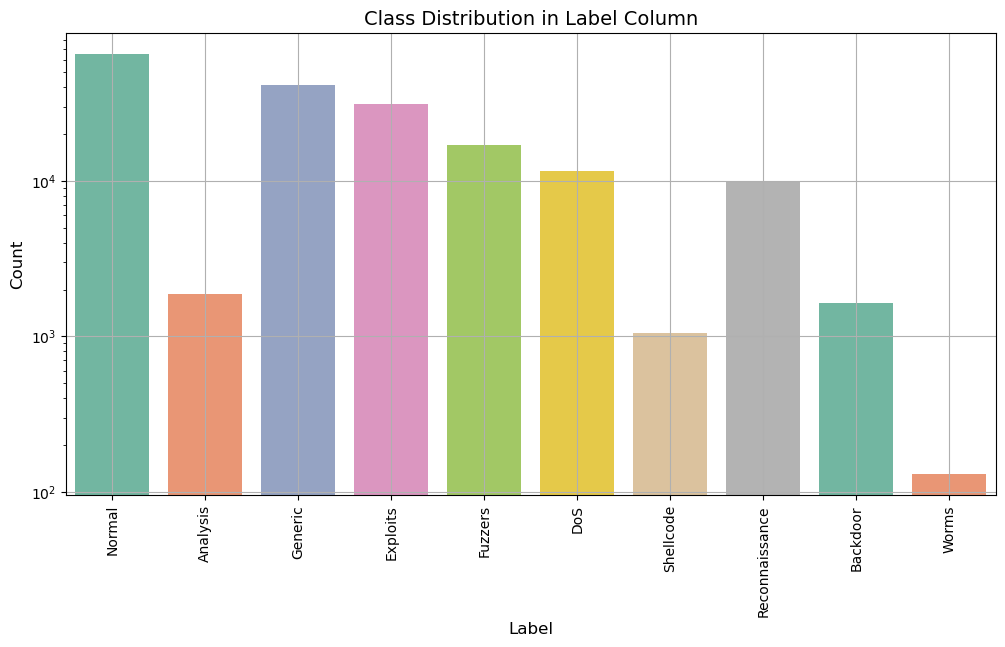

In [4]:
def plot_class_distribution_(data, column='Label'):
    plt.rcParams.update({'font.size': 8})
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f"Class Distribution in {column} Column", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tick_params(axis='both', labelsize=10)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

plot_class_distribution_(train_data)


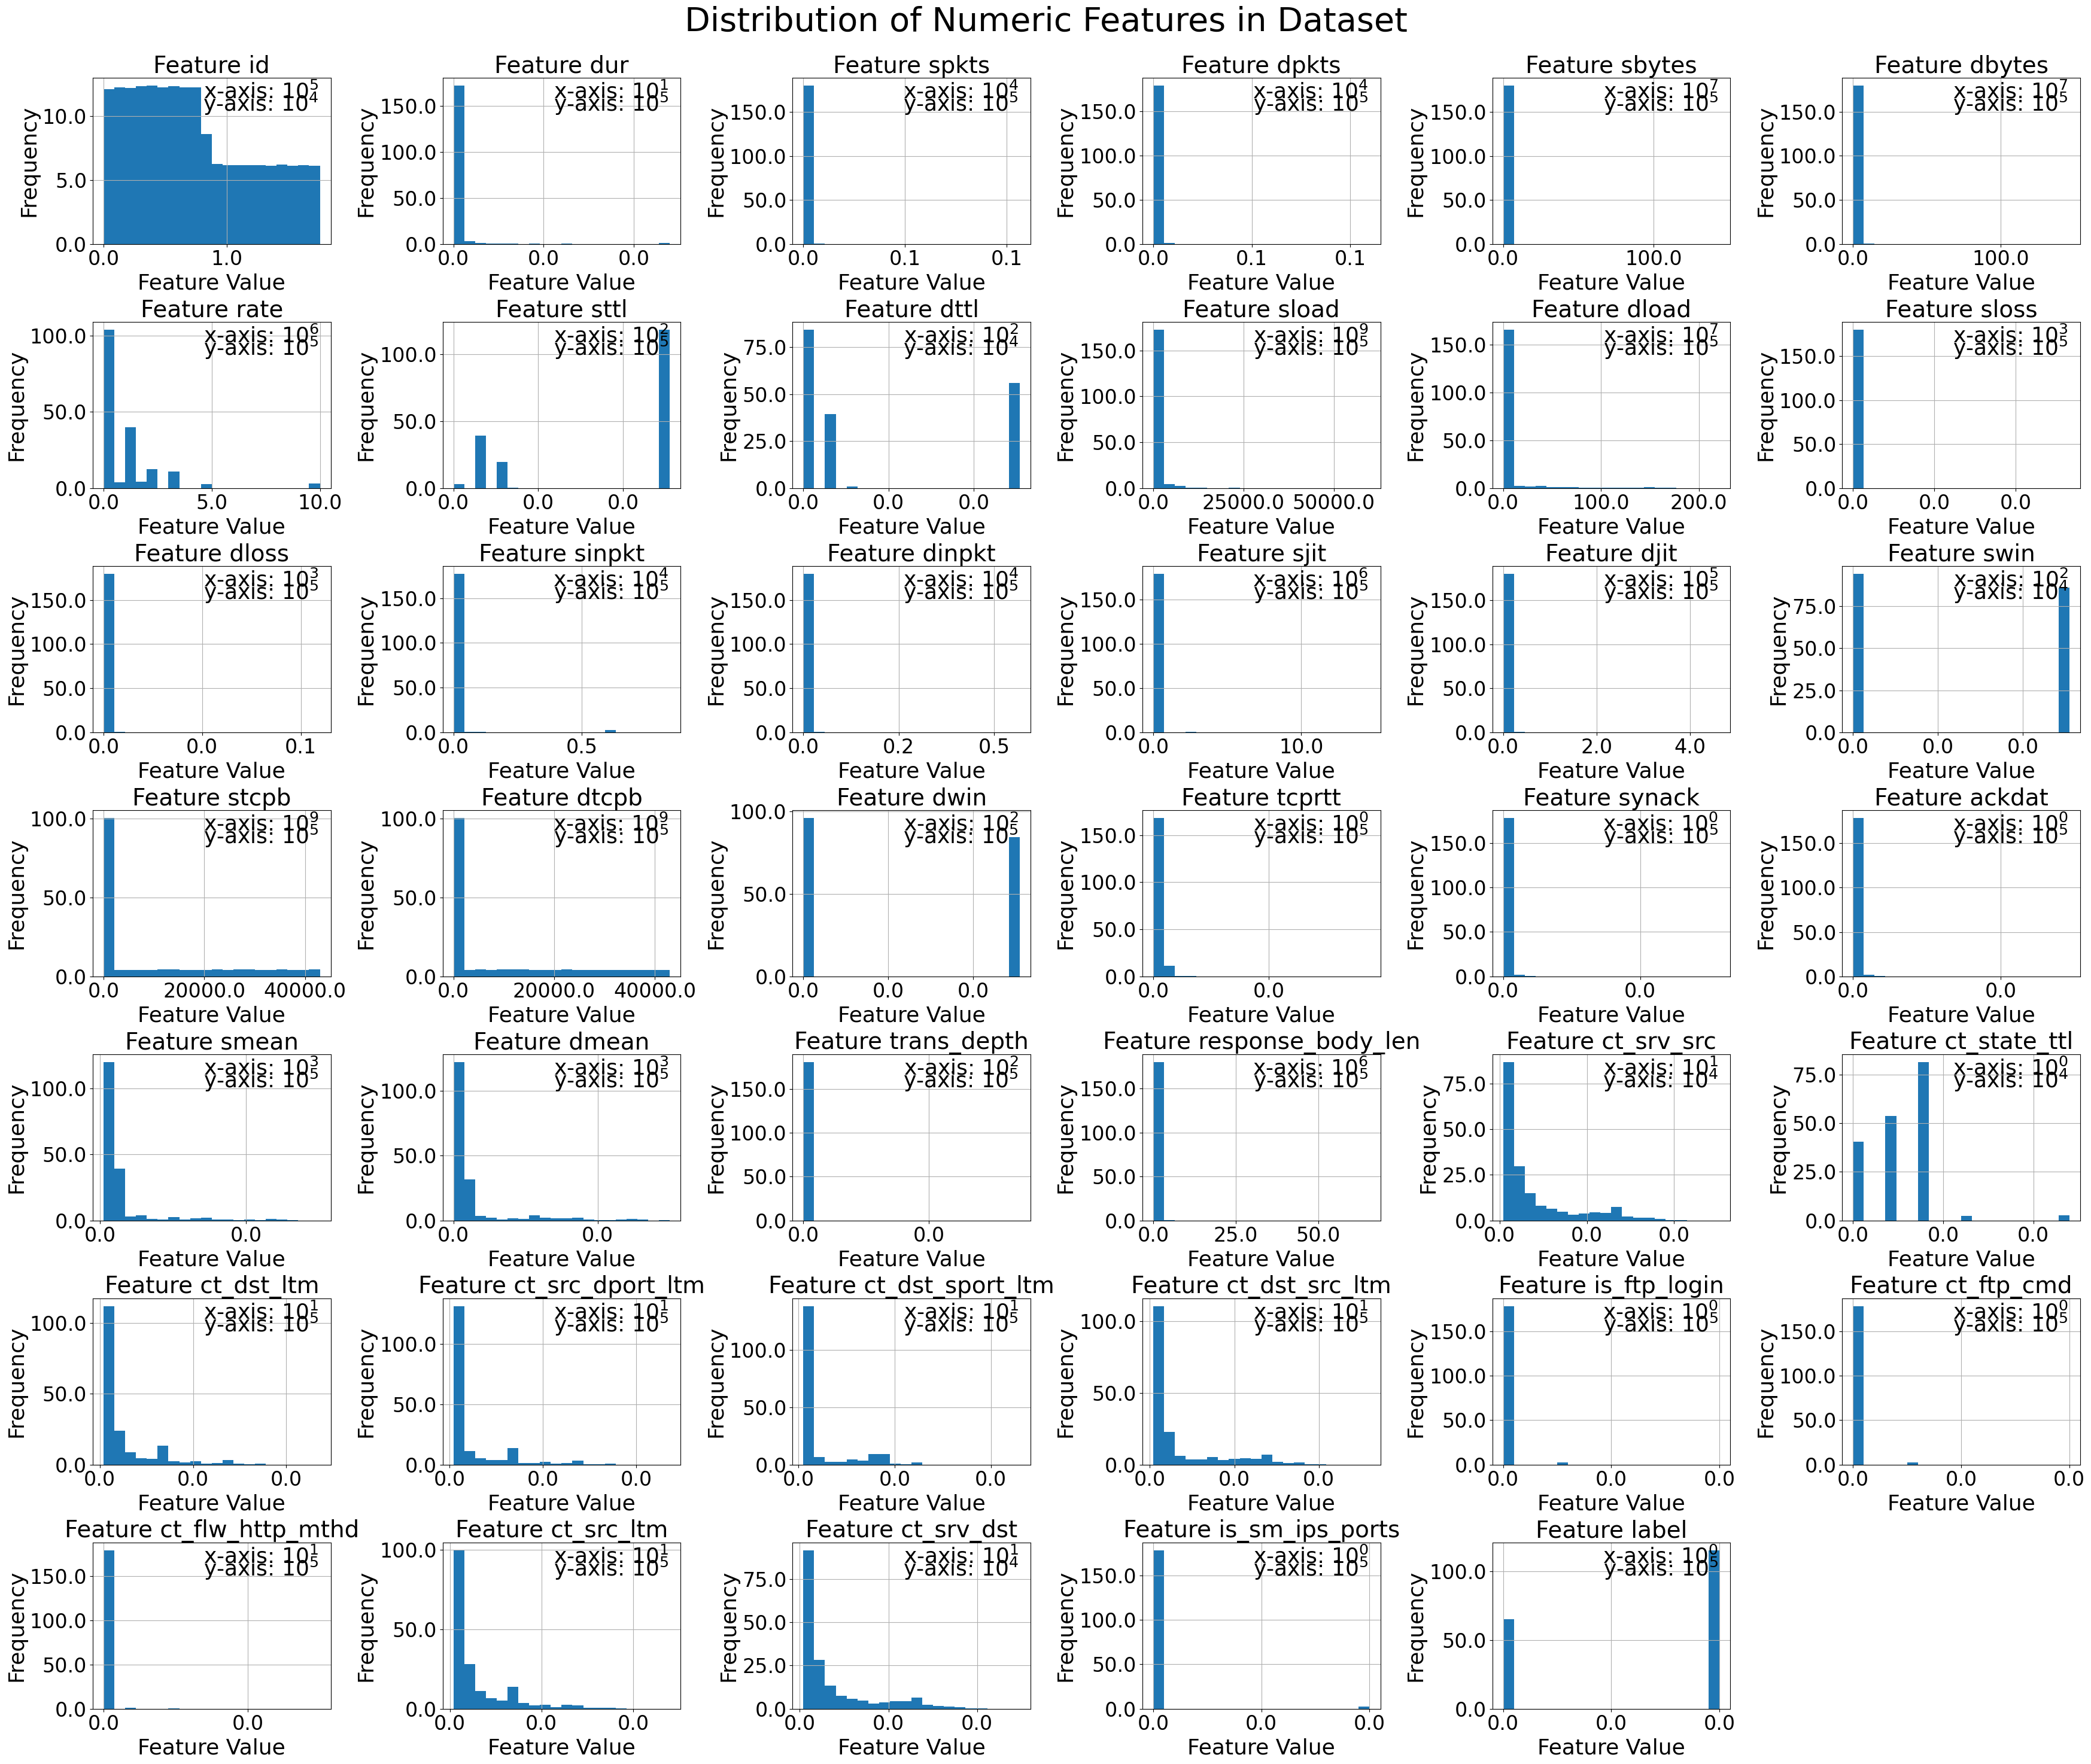

In [5]:
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
plot_numeric_feature_distribution(train_data, numeric_features)

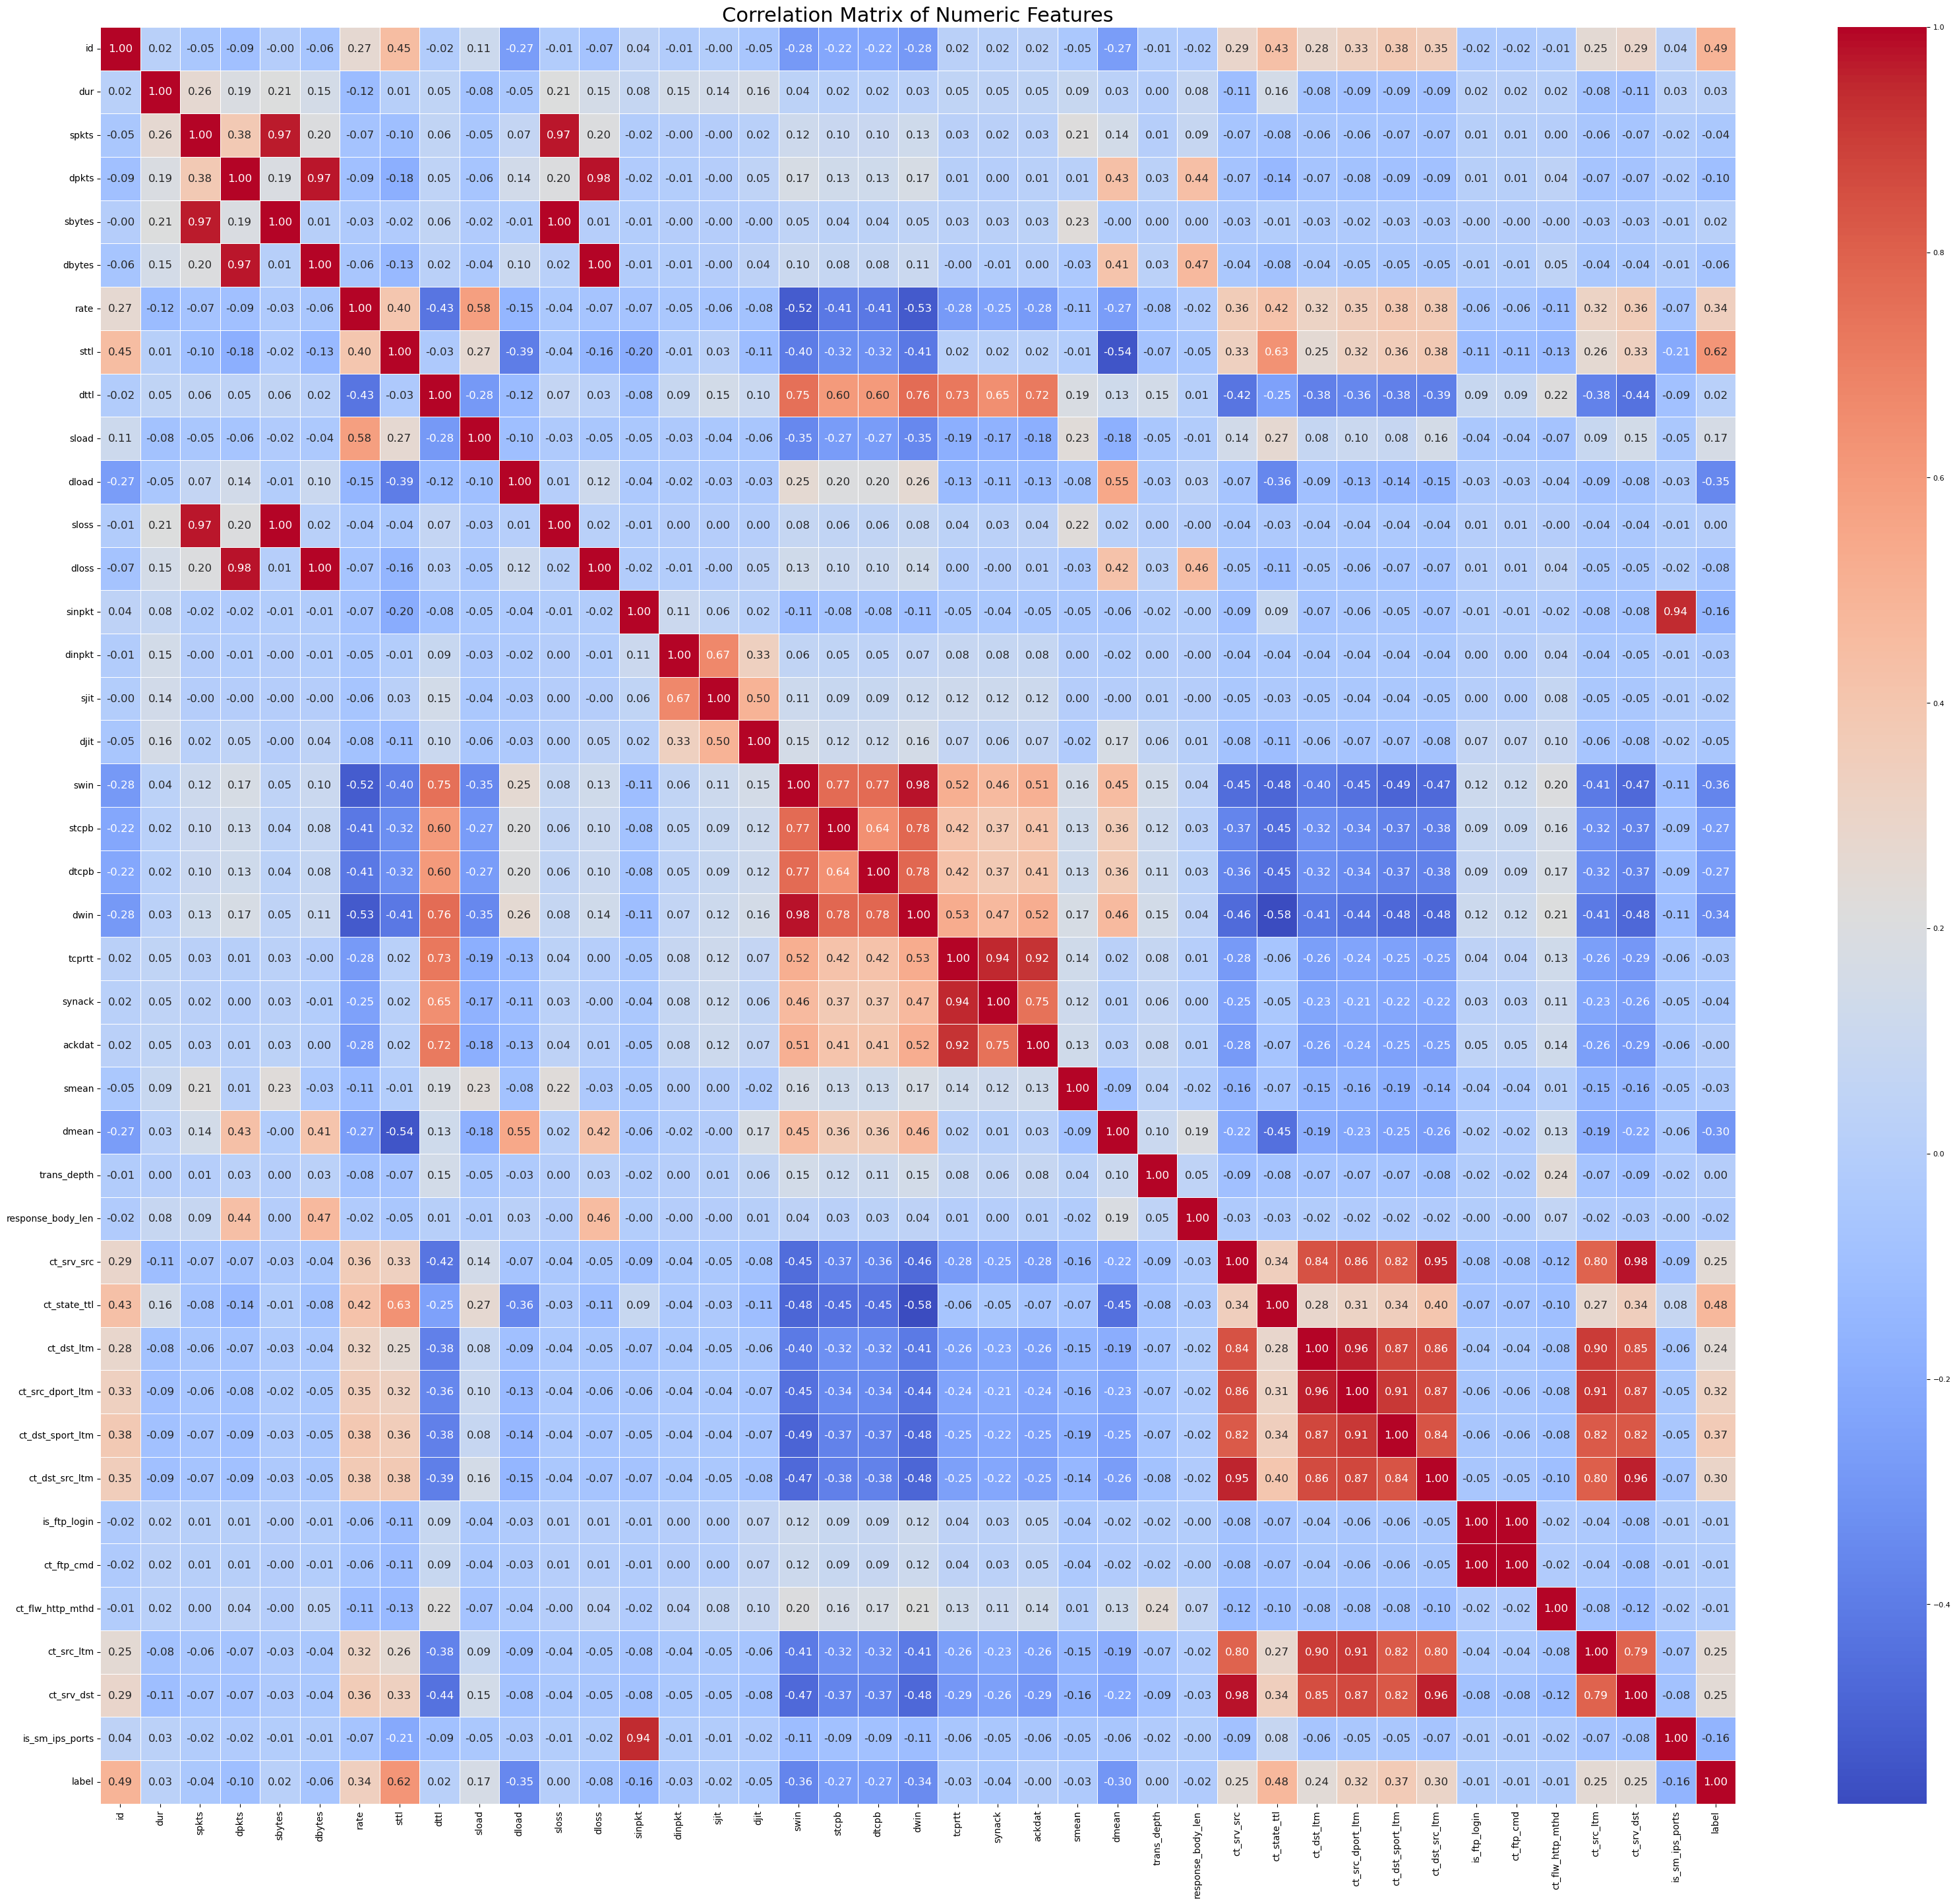

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, numeric_features):
    correlation_matrix = data[numeric_features].corr()
    plt.figure(figsize=(40, 35))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size":12})

    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
    plt.title("Correlation Matrix of Numeric Features", fontsize=22)
    plt.show()

numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_correlation_matrix(train_data, numeric_features)
